In [5]:
opts = {
    'powders': [
        {'omega': 5.7, 'dbname': '22/1 тр'}
    ],
    'init_conditions': {
        'q': 27.3,
        'd': 0.122,
        'W_0': 0.01092,
        'phi_1': 1.02,
        'p_0': 30e6,
        'n_S': 1.04
    },
    'igniter': {
        'p_ign_0': 1e6},
    'heat':{
        'enabled': False,
        'heat_barrel': False
    },
    'windage':{
        'p_0a': 1e-9
    },
    'meta_termo': {
        'dt': 1e-6, 
        'method': 'rk4'},
    'meta_lagrange': {
        'n_cells': 300, 
        'CFL': 0.9},
    'stop_conditions': {
        'x_p': 4.88, 
        'steps_max': 100000
        }
    }

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['figure.dpi'] = 150

In [7]:
from pyballistics import ozvb_termo, ozvb_lagrange, get_options_sample_2

opts = get_options_sample_2()

res = ozvb_termo(opts)

res2 = ozvb_lagrange(opts)

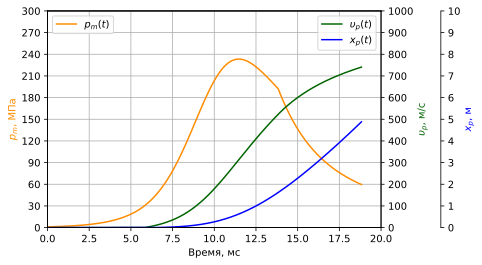

In [8]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(0, 20)

plim = (0,300)
vlim = (0, 1000)
xlim = (0, 10)

host.set_ylim(*plim)
par1.set_ylim(*vlim)
par2.set_ylim(*xlim)

n=11
host.yaxis.set_ticks(np.linspace(*plim, n))
par1.yaxis.set_ticks(np.linspace(*vlim, n))
par2.yaxis.set_ticks(np.linspace(*xlim, n))

host.set_xlabel("Время, мс")
host.set_ylabel("$p_m$, МПа")
par1.set_ylabel("$\\upsilon_p$, м/с")
par2.set_ylabel("$x_p$, м")

color1 = 'darkorange'
color2 = 'darkgreen'
color3 = 'blue'

p1, = host.plot(res['t']*1e3, res['p_m']/1e6, color=color1, label='$p_m(t)$')
p2, = par1.plot(res['t']*1e3, res['v_p'], color=color2, label='$\\upsilon_p(t)$')
p3, = par2.plot(res['t']*1e3, res['x_p'], color=color3, label='$x_p(t)$')

lns = [p1]
lns2 = [p2, p3]
host.legend(handles=lns, loc='upper left')
par1.legend(handles=lns2, loc='upper right')
par2.spines['right'].set_position(('outward', 60))      

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

host.grid()
plt.show()

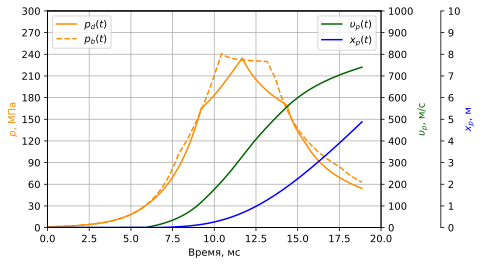

In [9]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(0, 20)

plim = (0,300)
vlim = (0, 1000)
xlim = (0, 10)

host.set_ylim(*plim)
par1.set_ylim(*vlim)
par2.set_ylim(*xlim)

n=11
host.yaxis.set_ticks(np.linspace(*plim, n))
par1.yaxis.set_ticks(np.linspace(*vlim, n))
par2.yaxis.set_ticks(np.linspace(*xlim, n))

host.set_xlabel("Время, мс")
host.set_ylabel("$p$, МПа")
par1.set_ylabel("$\\upsilon_p$, м/с")
par2.set_ylabel("$x_p$, м")

color1 = 'darkorange' 
color2 = 'darkgreen' 
color3 = 'blue' 

ps_d = np.array([lr['p'][-1] for lr in res2['layers']])
ps_b = np.array([lr['p'][0] for lr in res2['layers']])
v_p = np.array([lr['u'][-1] for lr in res2['layers']])
x_p = np.array([lr['x'][-1] for lr in res2['layers']])
ts =  np.array([lr['t'] for lr in res2['layers']])

p1, = host.plot(ts*1e3, ps_d/1e6, color=color1, label='$p_d(t)$')
p11, = host.plot(ts*1e3, ps_b/1e6, '--', color=color1, label='$p_b(t)$')
p2, = par1.plot(ts*1e3, v_p, color=color2, label='$\\upsilon_p(t)$')
p3, = par2.plot(ts*1e3, x_p, color=color3, label='$x_p(t)$')

lns = [p1, p11]
lns2 = [p2, p3]
host.legend(handles=lns, loc='upper left')
par1.legend(handles=lns2, loc='upper right')

par2.spines['right'].set_position(('outward', 60))      

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

host.grid()
plt.show()

In [10]:
res['v_p'][-1], res2['layers'][-1]['u'][-1]

(740.8491304979498, 740.4157129435149)

In [11]:
p_ball = np.array([np.sum(lr['p']*(lr['x'][1:]-lr['x'][:-1]))/(lr['x'][-1]-lr['x'][0]) for lr in res2['layers']])

np.max(res['p_m'])/1e6, np.max(p_ball)/1e6

(233.32847407199085, 233.29064219566564)

In [12]:
res['p_m'][-1]/1e6, p_ball[-1]/1e6

(59.63733938684612, 59.66856847778688)

In [13]:
v_ps = np.array([lr['u'][-1] for lr in res2['layers']])
ts = np.array([lr['t'] for lr in res2['layers']])

res['t'][res['v_p']==0][-1] * 1000, ts[v_ps==0][-1]*1000

(5.8050000000004465, 5.843561688134142)

In [14]:
res['t'][np.argmax(res['p_m'])] * 1000, ts[np.argmax(p_ball)] * 1000

(11.468999999998026, 11.51964552882062)

In [15]:
np.max(ps_d)/1e6, np.max(ps_b)/1e6

(234.71535718974155, 240.7672611284714)

In [16]:
res['t'][-1]*1000, ts[-1]*1000

(18.82299999999817, 18.85546687558238)

In [17]:
gs1 = (res['v_p'][1:] - res['v_p'][:-1]) / (res['t'][1:] - res['t'][:-1])
gs2 = (v_ps[1:] - v_ps[:-1]) / (ts[1:] - ts[:-1])

np.max(gs1) / 9.81, np.max(gs2) / 9.81

(9717.972268993248, 10442.480877026395)

In [18]:
psis = np.array([np.min(lr['psi_1']) for lr in res2['layers']])

res['x_p'][res['psi_1']<1-1e-8][-1], x_p[psis<1-1e-8][-1]

(1.6223336255929015, 1.8903653445353807)